In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from brokenaxes import brokenaxes
import pickle

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


## config 1 (for now just testing)

In [18]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/smf_simulations'
real_vals = [7e-4, -2]
piv = 100

folders = [
    f'{path}/test_data_normal_new/test_fit_better',
    f'{path}/test_data_normal_new_small_K/test_fit',
    f'{path}/test_data_normal_new/spimodfit',
    f'{path}/test_data_normal_new_small_K/spimodfit',
    f'{path}/test_data_normal_new/spimodfit_wo_low_energy',
    f'{path}/test_data_normal_new_small_K/spimodfit_wo_low_energy',

]
# folders = [
#     f'{path}/normal_new/0374/pre_ppc',
#     f'{path}/normal_reduced_bkg_10_new/0374/pre_ppc',
#     f'{path}/normal_new/0374/spimodfit',
#     f'{path}/normal_reduced_bkg_10_new/0374/spimodfit',
# ]



names = [
    'Pyspi; $K_1$',
    'Pyspi; $K_2$',
    'Spimodfit; $K_1$',
    'Spimodfit; $K_2$',
    'Spimodfit; $K_1$; no low energy',
    'Spimodfit; $K_2$; no low energy',
]

std_devs = [
    5,
    5,
    5,
    5,
    5,
    5,
    10,
]

names = [f"{std_devs[i]}$\\sigma$-{names[i]}" for i in range(len(folders))]

edgecolors = [
    "C0",
    "C1",
    "C0",
    "C1",
    "C2",
    
    "C3",
    "C4",
    "C4"
]
linestyles = [
    "solid",
    "solid",
    #"solid",
    "dashed",
    "dashed",
    'dotted',
    "dotted",
    "dashed",
    "dotted",
]


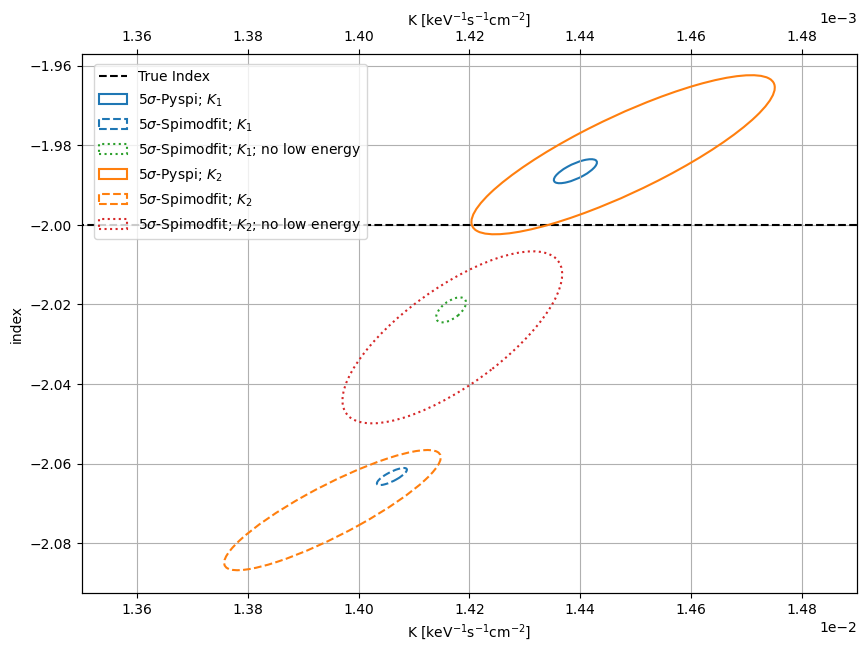

In [21]:
import math
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 7))
ax2 = ax.twiny()

ax.plot((1.2e-2, 1.6e-2),(-2, -2), "k--", label="True Index")

for folder, name, edgecolor, linestyle, std_dev in zip(folders, names, edgecolors, linestyles, std_devs):
    with open(f"{folder}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    if "small_K" in folder:
        confidence_ellipse(val, cov, ax2, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle, linewidth=1.5)
    else:
        confidence_ellipse(val, cov, ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle, linewidth=1.5)
# ax.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax2.autoscale()
ax.autoscale()
ax.set_xlim(1.35e-2, 1.49e-2)
ax2.set_xlim(1.35e-3, 1.49e-3)
ax.grid()


# fig.legend(loc='upper right', bbox_to_anchor=(1.1,0.89), ncol=1)
fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.875), ncol=1)
#plt.legend()
ax.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax2.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax.set_ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



In [15]:
fig.savefig(f"{path}/comparison_combined_plot.pdf", bbox_inches='tight')

# For the more correct data. Better handling of the time 

In [4]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/smf_simulations'
real_vals = [7e-4, -2]
piv = 100

folders = [
    f'{path}/K_1/test_fit',
    f'{path}/K_01/test_fit',
    f'{path}/K_1/spimodfit',
    f'{path}/K_01/spimodfit',
    f'{path}/K_1/spimodfit_wo_low_energy',
    f'{path}/K_01/spimodfit_wo_low_energy',

]
# folders = [
#     f'{path}/normal_new/0374/pre_ppc',
#     f'{path}/normal_reduced_bkg_10_new/0374/pre_ppc',
#     f'{path}/normal_new/0374/spimodfit',
#     f'{path}/normal_reduced_bkg_10_new/0374/spimodfit',
# ]



names = [
    'Pyspi; $K_1$',
    'Pyspi; $K_2$',
    'Spimodfit; $K_1$',
    'Spimodfit; $K_2$',
    'Spimodfit; $K_1$; no low energy',
    'Spimodfit; $K_2$; no low energy',
]

std_devs = [
    5,
    5,
    5,
    5,
    5,
    5,
    10,
]

names = [f"{std_devs[i]}$\\sigma$-{names[i]}" for i in range(len(folders))]

edgecolors = [
    "C0",
    "C1",
    "C0",
    "C1",
    "C2",
    
    "C3",
    "C4",
    "C4"
]
linestyles = [
    "solid",
    "solid",
    #"solid",
    "dashed",
    "dashed",
    'dotted',
    "dotted",
    "dashed",
    "dotted",
]


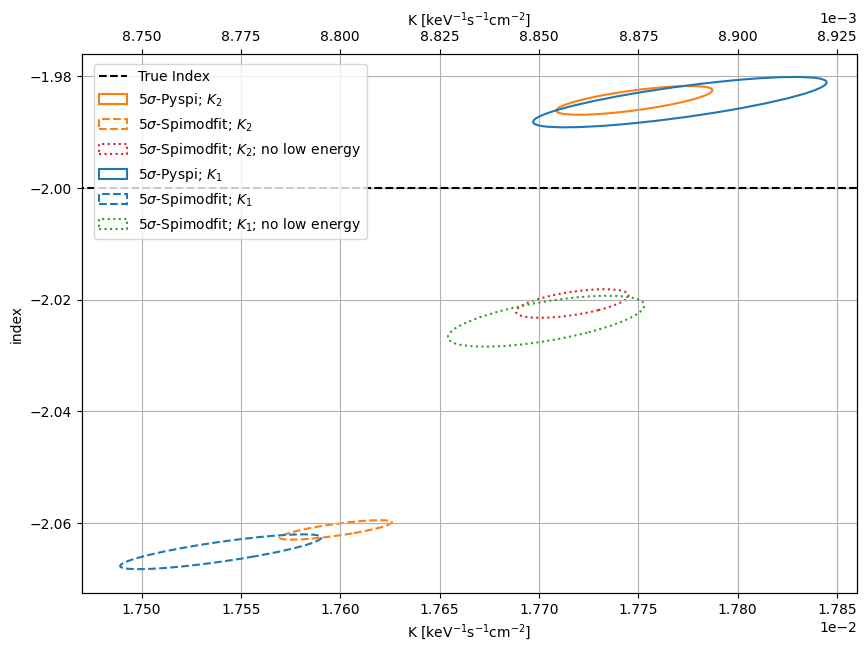

In [14]:
import math
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 7))
ax2 = ax.twiny()

ax.plot((1.2e-2, 5e-2),(-2, -2), "k--", label="True Index")

for folder, name, edgecolor, linestyle, std_dev in zip(folders, names, edgecolors, linestyles, std_devs):
    with open(f"{folder}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    if "K_1" in folder:
        confidence_ellipse(val, cov, ax2, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle, linewidth=1.5)
    else:
        confidence_ellipse(val, cov, ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle, linewidth=1.5)
# ax.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax2.autoscale()
ax.autoscale()
ax_limits = np.array([8.735e-3, 8.93e-3])
ax.set_xlim(*ax_limits*2)
ax2.set_xlim(*ax_limits)
ax.grid()


# fig.legend(loc='upper right', bbox_to_anchor=(1.1,0.89), ncol=1)
fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.875), ncol=1)
#plt.legend()
ax.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax2.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax.set_ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



In [15]:
fig.savefig(f"{path}/comparison_combined_plot_2.pdf", bbox_inches='tight')